<h1>Capstone Project ALY 6140 Winter 2021</h1>
<h2>Aayushi Gupta</h2>


<h3>Introduction</h3>

The dataset that I have chosen to analyze for my final week's capstone project is the Energy Consumption by various properties.This data set contains electricity, natural gas, and heating oil usage from 2017 of all non-residential buildings greater than 35,000 square feet, residential buildings that are 35,000 square feet or larger or have 35 or more units, any parcel with multiple buildings that sum to 100,000 square feet or 100 unit, and all municipal buildings that reported in 2018 in Boston. 
This Jupyter notebook consists of all the necessary commands used to perform the analysis. This notebook consists of the following-:
<ol>
    <li>Data Extraction</li>
    <li>Data Cleanup</li>
    <li>Data Visualization</li>
    <li>Descriptive Analytics</li>
    <li>Predictive Analytics</li>
</ol>

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
print("Libraries Imported")


Libraries Imported


<h3>1. Data Extraction</h3>

Data extraction is the process of collecting or retrieving disparate types of data from a variety of sources, many of which may be poorly organized or completely unstructured. Data extraction makes it possible to consolidate, process, and refine data so that it can be stored in a centralized location in order to be transformed. These locations may be on-site, cloud-based, or a hybrid of the two.

Data extraction is the first step in both ETL (extract, transform, load) and ELT (extract, load, transform) processes. ETL/ELT are themselves part of a complete data integration strategy.

In [2]:

df=pd.read_csv("https://data.boston.gov/dataset/b09a8b71-274b-4365-9ce6-49b8b44602ef/resource/da68dc1a-46ad-4fd9-8627-8ca7e5fd39dd/download/berdo-data-for-disclosure-calendar-year-2017.csv",encoding='cp1252')
#To download the dataset-:
# Visit https://data.boston.gov/dataset/building-energy-reporting-and-disclosure-ordinance/resource/da68dc1a-46ad-4fd9-8627-8ca7e5fd39dd
#Click on download dataset
#use the code below for dowloaded dataset-:
#path="" enter the path of the csv file
#df=pd.read_csv(path)
df.head()

,Property Name,Reported,Property Type,Address,ZIP,Gross Area (sq ft),Site EUI (kBTU/sf),Energy Star Score,Energy Star Certified,Property Uses,...,Total Site Energy (kBTU),% Electricity,% Gas,% Steam,Water Intensity (gal/sf),Onsite Renewable (kWh),User Submitted Info,User Submitted Link,Tax Parcel,Years Reported
0,251 Causeway - Ste# 700490,Compliant,Office,251 Causeway Street,02114,150097,62,75.0,"2017, 2016, 2015, 2014, 2013","Medical Office, Office",...,9310256.1,0.948339574,0.048892318,NaN,9.72,NaN,NaN,NaN,301510000,"2014, 2015, 2016, 2017, 2018,"
1,South Cove Plaza East - 285 TREMONT: 26145951005,Compliant,Multifamily Housing,285 TREMONT,02116,85986,24,96.0,NaN,Multifamily Housing,...,2060341.7,1.000041325,NaN,NaN,53.76,NaN,NaN,NaN,500066000,"2015, 2016, 2018,"
2,Woodbourne Apartments,Compliant,Multifamily Housing,6 Southbourne Rd,02130,49064,82.3,53.0,NaN,Multifamily Housing,...,4036588.1,0.248623256,0.751387043,NaN,63.19,NaN,NaN,NaN,1904952000,"2015, 2016, 2017, 2018,"
3,Navy Yard 34-39: Building 34,Compliant,Office,1 1st Avenue,02129,49247,274.8,1.0,NaN,"Bank Branch, Office, Retail Store",...,13531047.8,0.911122218,0.088915479,NaN,13.47,NaN,NaN,NaN,203512000,"2017, 2018,"
4,One Appleton,Compliant,Office,1 Appleton Street,02116,40000,44.7,99.0,NaN,"Office, Restaurant",...,1789160.6,0.228974011,0.771035565,NaN,17.9,NaN,NaN,NaN,500693000,"2016, 2017, 2018,"


In [3]:
df.Reported.unique() #displaying unique values of the Reported column of the dataframe.

array(['Compliant', 'Municipal ', 'Voluntary'], dtype=object)

<h2>Describing the dataset</h2> 

This data set contains electricity, natural gas, and heating oil usage from 2017 of all non-residential buildings greater than 35,000 square feet, residential buildings that are 35,000 square feet or larger or have 35 or more units, any parcel with multiple buildings that sum to 100,000 square feet or 100 unit, and all municipal buildings that reported in 2018.This dataset gives a very detailed description of the energy consumption in the form of electricity, gas and steam. 
It lists all the properties with their ZIP codes and addresses and reports them as either Compliant,Municipal or Voluntary. It also lists the type of property.<br>



For each property, energy star score is given.Using the energy star score we can understand how a building energy's consumption measures up against similar buildings nationwide. A score of 50 represents median energy performance, while a score of 75 or better indicates that the building is a top performer. To be eligible for an energy star certification, the building needs to earn an energy star score of 75 or higher. The EUI of a site is the energy use intensity of the building.
The GHG emissions (MTCO2e) tells the green house gas emissions in metric tons of carbon dioxide equivalent. 
The data informs about the total area of the building and the energy used by it and also gives a breakdown of these energies in electricty gas and steam.<br>



<h2>Questions to be answered</h2>

Using this data, a lot of comparisons can be made between different columns of the dataframe. One of the questions that can be answered using this data are-
<ul>
<li>How does the area of a building affect its energy consumption</li>
<li>Which buildings consume the maximum energy? </li>
<li>Will an increase in area increase the energy consumption of the building?</li>
<li>What is the average energy use intensity of the buildings in Boston ?</li>
    <li>What is the maxim,um energy use intensity of the buildings in Boson?</li>
<li>Which type of properties have the highest energy star score ?</li>
    <li>What is the average energy star score of the buildings in Boston</li>
</ul>

<h2>2. Data cleanup</h2>

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.

Step 1: Remove duplicate or irrelevant observations

Step 2: Fix structural errors

Step 3: Filter unwanted outliers

Step 4: Handle missing data

5 characteristics of quality data
<ol>
<li>Validity: The degree to which your data conforms to defined business rules or constraints. </li>
    <li>Accuracy: Ensure your data is close to the true values. </li>
    <li> Completeness. The degree to which all required data is known. </li>
<li> Consistency. Ensure your data is consistent within the same dataset and/or across multiple data sets. </li>
    <li> Uniformity. The degree to which the data is specified using the same unit of measure. </li>
    </ol>

In [4]:
def main():
    print(df.shape) #displays the number of rows and columns
    df.drop_duplicates(subset ="Property Name", keep = "first", inplace = True) 
    print(df.shape)
    for col in df.columns:
        print(col) 
    df.drop(['Energy Star Certified',' Onsite Renewable (kWh) ','User Submitted Info','User Submitted Link','Tax Parcel','% Steam'], axis = 1,inplace=True)
    

In [5]:
def graph(a,b):
    df_1 = df.groupby(['Property Type'])[a].mean()
    df_1.plot.bar()
    plt.title(b)
    plt.xlabel('Property Type')
    plt.ylabel(a)
    plt.show()

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Gross Area')
    plt.ylabel('Total site energy')

    plt.show()
    plt.close()

In [6]:
if __name__=="__main__": 
    main() 

(1914, 23)
(1893, 23)
Property Name
Reported
Property Type
Address
ZIP
 Gross Area (sq ft) 
Site EUI (kBTU/sf)
Energy Star Score
Energy Star Certified
Property Uses
Year Built
 GHG Emissions (MTCO2e) 
GHG Intensity (kgCO2/sf)
 Total Site Energy (kBTU) 
% Electricity
% Gas
% Steam
Water Intensity (gal/sf)
 Onsite Renewable (kWh) 
User Submitted Info
User Submitted Link
Tax Parcel
Years Reported


In [7]:
#to find out blank entries
missing_data = df.isnull()
missing_data.head(5)

,Property Name,Reported,Property Type,Address,ZIP,Gross Area (sq ft),Site EUI (kBTU/sf),Energy Star Score,Property Uses,Year Built,GHG Emissions (MTCO2e),GHG Intensity (kgCO2/sf),Total Site Energy (kBTU),% Electricity,% Gas,Water Intensity (gal/sf),Years Reported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Property Name
False    1892
True        1
Name: Property Name, dtype: int64

Reported
False    1893
Name: Reported, dtype: int64

Property Type
False    1892
True        1
Name: Property Type, dtype: int64

Address
False    1893
Name: Address, dtype: int64

ZIP
False    1892
True        1
Name: ZIP, dtype: int64

 Gross Area (sq ft) 
False    1892
True        1
Name:  Gross Area (sq ft) , dtype: int64

Site EUI (kBTU/sf)
False    1892
True        1
Name: Site EUI (kBTU/sf), dtype: int64

Energy Star Score
False    1161
True      732
Name: Energy Star Score, dtype: int64

Property Uses
False    1892
True        1
Name: Property Uses, dtype: int64

Year Built
False    1892
True        1
Name: Year Built, dtype: int64

 GHG Emissions (MTCO2e) 
False    1892
True        1
Name:  GHG Emissions (MTCO2e) , dtype: int64

GHG Intensity (kgCO2/sf)
False    1892
True        1
Name: GHG Intensity (kgCO2/sf), dtype: int64

 Total Site Energy (kBTU) 
False    1892
True        1
Name:  Total Site Ene

In [9]:
df.replace("Not Available", np.nan, inplace = True)
df.replace('?',np.nan,inplace=True)
df.dropna(subset=[" Gross Area (sq ft) "], axis=0, inplace=True)
df.dropna(subset=[" Total Site Energy (kBTU) "], axis=0, inplace=True)
df.dropna(subset=["% Gas"], axis=0, inplace=True)
df.dropna(subset=["Energy Star Score"], axis=0, inplace=True)

In [10]:
df.dropna(subset=[" GHG Emissions (MTCO2e) "], axis=0, inplace=True)
df.dropna(subset=["Site EUI (kBTU/sf)"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
#changing column names for ease of accessibility
df.rename(columns = {' Gross Area (sq ft) ':'Gross Area(sq ft)', ' GHG Emissions (MTCO2e) ':'GHG Emissions(MTCO2e)', 
                              ' Total Site Energy (kBTU) ':'Total Site Energy (kBTU)'}, inplace = True)

In [12]:
#filling in missing data of water intensity
avg_water_intensity = df["Water Intensity (gal/sf)"].astype("float").mean(axis=0)
print("Average of water intensity", avg_water_intensity)
df["Water Intensity (gal/sf)"].replace(np.nan, avg_water_intensity, inplace=True)

Average of water intensity 21205.192644230756


In [13]:
#checking the datatype of the column entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Property Name             975 non-null    object 
 1   Reported                  975 non-null    object 
 2   Property Type             975 non-null    object 
 3   Address                   975 non-null    object 
 4   ZIP                       975 non-null    object 
 5   Gross Area(sq ft)         975 non-null    object 
 6   Site EUI (kBTU/sf)        975 non-null    object 
 7   Energy Star Score         975 non-null    float64
 8   Property Uses             975 non-null    object 
 9   Year Built                975 non-null    float64
 10  GHG Emissions(MTCO2e)     975 non-null    object 
 11  GHG Intensity (kgCO2/sf)  975 non-null    object 
 12  Total Site Energy (kBTU)  975 non-null    object 
 13  % Electricity             970 non-null    object 
 14  % Gas     

In [14]:
#converting string type into float for easy analysis and computation
df["Gross Area(sq ft)"] = pd.to_numeric(df["Gross Area(sq ft)"])
df["Total Site Energy (kBTU)"] = pd.to_numeric(df["Total Site Energy (kBTU)"])
df["Site EUI (kBTU/sf)"] = pd.to_numeric(df["Site EUI (kBTU/sf)"])
df["GHG Intensity (kgCO2/sf)"] = pd.to_numeric(df["GHG Intensity (kgCO2/sf)"])

In [15]:
df.head() #cleaned data

,Property Name,Reported,Property Type,Address,ZIP,Gross Area(sq ft),Site EUI (kBTU/sf),Energy Star Score,Property Uses,Year Built,GHG Emissions(MTCO2e),GHG Intensity (kgCO2/sf),Total Site Energy (kBTU),% Electricity,% Gas,Water Intensity (gal/sf),Years Reported
0,251 Causeway - Ste# 700490,Compliant,Office,251 Causeway Street,02114,150097.0,62.0,75.0,"Medical Office, Office",1909.0,703,4.7,9310256.1,0.948339574,0.048892318,9.72,"2014, 2015, 2016, 2017, 2018,"
1,Woodbourne Apartments,Compliant,Multifamily Housing,6 Southbourne Rd,02130,49064.0,82.3,53.0,Multifamily Housing,1980.0,238,4.9,4036588.1,0.248623256,0.751387043,63.19,"2015, 2016, 2017, 2018,"
2,Navy Yard 34-39: Building 34,Compliant,Office,1 1st Avenue,02129,49247.0,274.8,1.0,"Bank Branch, Office, Retail Store",1989.0,1009.1,20.5,13531047.8,0.911122218,0.088915479,13.47,"2017, 2018,"
3,One Appleton,Compliant,Office,1 Appleton Street,02116,40000.0,44.7,99.0,"Office, Restaurant",1900.0,104.7,2.6,1789160.6,0.228974011,0.771035565,17.9,"2016, 2017, 2018,"
4,One Beacon,Compliant,Office,1 Beacon Street,02108,1136283.0,102.1,81.0,"Data Center, Office, Parking",1973.0,8178.9,7.2,116022321.3,0.418717059,0.015490123,9.18,"2014, 2015, 2016, 2017, 2018,"


<h3>3. Data Visualization and Descriptive Analysis</h3>

Now that the data has been properly cleaned, it is now ready to visualize trends and perform analysis.
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.
Some of the ways in which data can be visualized are:
<ul>
    <li>Line graphs</li>
    <li>Bar Graphs</li>
    <li>Area Plots</li>
    <li>Histograms</li>
    <li>Waffle Charts</li>
    <li>Pie Charts</li>
</ul>
For this project I have used bar graphs to visualize important trends of the data.

A bar plot is a way of representing data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

<h3>Visualizing the energy consumed by different property types</h3>

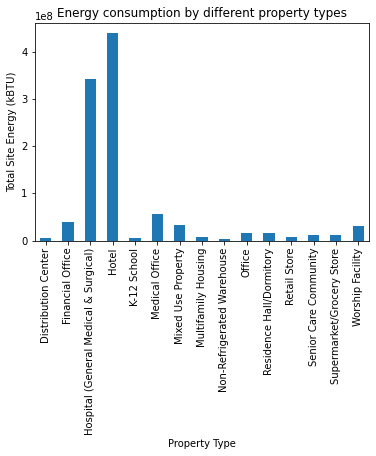

In [16]:
#plotting a bar graph to visualize which property type consumes how much energy
graph('Total Site Energy (kBTU)','Energy consumption by different property types')  

<ul>
    <li>From the bar graph, it is clear that hotels and hospitals consume the maximum energy.</li>
<li>There is a huge gap between the energy consumed by the hotels and hospitals and the other property types.</li>
<li>This gap is mainly due to the variable equipment efficiency and energy management practices used by the hotels and hospitals.</li>
</ul>


Below is how energy used in the hotels can be minimized-:

Lighting represents almost a quarter of all electricity consumed in a typical hotel, not including its effect on cooling loads. Lighting retrofits can reduce lighting electricity use by 50 percent or more, depending on the starting point, and cut cooling energy requirements by 10 to 20 percent as well.
Installing timers on bathroom heat lamps and consider connecting bathroom exhaust fans to light switches to reduce excessive operation.
Replace light bulbs with more efficient ones.
Use daylighting. Natural daylight has been shown to improve a hotel’s indoor environment while reducing energy use and peak demand. Whenever possible, any lighting renovation should start by using daylighting as much as possible and reducing electric lighting accordingly.
Update lighting with ENERGY STAR certified CFL and LED bulbs. 
Install occupancy sensors.
Heating and cooling represent almost 40 percent of the electricity and more than half of the natural gas used by hotels and motels. Many hotels heat and cool rooms regardless of whether they are occupied, despite studies having shown that hotel rooms are unoccupied for 12 hours each day on average.

Link the energy management system (EMS), reservation system, and automated check-out system together to keep an unsold room ventilated but with minimal heating or cooling. A sold room can be heated or cooled to a comfortable temperature an hour before a guest’s scheduled arrival. Once the guests arrive in the room, they can then adjust the temperature as they like until they check out, when the HVAC system returns to the unsold mode. An EMS can enhance guest comfort while reducing energy costs by 35 to 45 percent, for a return on investment of 50 to 75 percent.
Seal cracks around windows, doors, and through-the-wall or window type HVAC units with caulk and weather-strip doors and operable windows.
Change air filter regularly. Check your filter every month, especially during heavy use months (winter and summer). If the filter looks dirty after a month, change it. At a minimum, change the filter every three months. A dirty filter will slow down air flow and make the system work harder to keep you warm or cool—wasting energy.
Tune up the HVAC equipment yearly. Just like a tune-up for your car can improve your gas mileage, a yearly tune-up of your heating and cooling system can improve efficiency and comfort.
During periods of low occupancy, close down entire wings or floors and reduce lighting and HVAC systems in these areas.
Assign guests to adjoining rooms to allow the heating and cooling of occupied rooms to act as a buffer or insulator.

Some of the ways in which energy can be minimized in hospitals:


Switching to LED will give the highest amount of energy savings. Lighting accounts for a large part of overall energy costs – 16% to be exact.
Retrofit light fixtures and light bulbs. This will give the highest energy savings, but also cost the most up-front. 

Search for “leaking” electricity. Before investing in new machinery, have the medical equipment already on site audited for energy use. It may be that major equipment needs an upgrade, but it may be that minor equipment plugged in all day is consuming energy even when turned off. For clinics and laboratories only open during normal business hours, this means much of your equipment is idling 16 hours a day. Energy efficient power strips can stop drawing energy when the equipment is not in use.
Take a look at your laundry services. ENERGY STAR-labeled washing machines use 63 percent less energy and half the water of conventional washing machines. Your staff can also be trained on when cold-water rinses are appropriate, as hot rinse settings use twice as much energy.


Redesign waste management. Hospitals in the United States produce 6,600 tons of waste a day. Fifty front-of-house trashcans at a busy hospital can produce 40,000 bags-to-the-dumpster a year. A study by the Commonweath Fund revealed that rethinking how you manage waste results in a five-year savings average of 40 cents per patient day. You may need to monitor for misuse of red medical waste bags, as it costs 13 times more to dispose of medical waste than regular waste. For public trash bins, Wi-Fi enabled cans with smart sensors can compact trash as it accumulates then signal a central computer when it is ready to be emptied. This prevents the bins from overflowing during peak use and prevents staff from using their time and resources to empty a can that is only half full.


Upgrade computers and other office equipment. ENERGY STAR-qualified office products like printers, monitors, scanners, mailing machines and water coolers consume 30 to 75 percent less energy than standard models. Flat-screen computer monitors also use considerably less energy. The University of Pittsburgh Medical Center installed a computer program to monitor power settings for 25,000 PCs across its on-site network, enabling administrators to put them in a sleep mode at night. A grant from the local utility company covered 30 percent of the project’s costs, and the hospital cut 50 percent of the power used by PCs.


Consider renewable sources of energy. Like Weed Army Community Hospital turned to solar power to cut its energy use by a third, Gundersen Health System in Wisconsin uses waste biogas created in the La Crosse County landfill to create electricity and heat that fully powers one of its multiple building healthcare campuses. A geothermal heat pump system heats and cools one hospital, and a biomass boiler at the main hospital’s campus takes care of 38 percent of the system’s energy needs. Solar panels power the underground parking garage, and a solar hot water unit offsets 85 percent of the Child Care Center’s hot water needs. Gundersen became the first health system in the nation to attain complete energy independence in 2014.

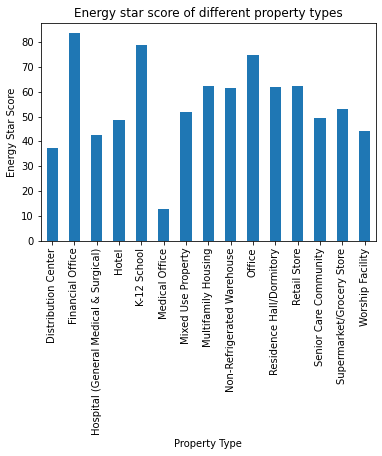

In [17]:
graph('Energy Star Score','Energy star score of different property types')

This bar graph reveals some very interesting facts. Except medical offices, all type of properties have an energy star score above 35. 
The 1 – 100 ENERGY STAR score is a screening tool that helps you assess how the building is performing. It helps to identify which buildings in portfolio to target for improvement or recognition. A score of 50 is the median. So if the building scores below 50, it means it’s performing worse than 50 percent of similar buildings nationwide, while a score above 50 means it’s performing better than 50 percent of its peers. And a score of 75 or higher means it’s a top performer and may be eligible for ENERGY STAR certification.

The ENERGY STAR score provides a comprehensive snapshot of the building’s energy performance. It assesses the building’s physical assets, operations, and occupant behavior in a quick and easy-to-understand number.

It can be clearly noted that only offices, K-12 schools and financial offices have an energy star score above 75. 

<h6>Energy Star Score for K-12 Schools</h6>

The ENERGY STAR Score for K-12 Schools applies to buildings or campuses used as a school for kindergarten through 12th grade students.The analysis for K-12 schools is based on data from the Department of Energy, Energy Information Administration’s Commercial Building Energy Consumption Survey (CBECS).
The analysis includes adjustments for:
<ul>
    <li>Number of Workers</li>
    <li>Whether or not the School is Open on Weekends</li>
    <li>Whether or not there is Energy Used for Cooking</li>
    <li>Whether or not the School is a High School</li>
    <li>Weather and Climate (using Heating and Cooling Degree Days, retrieved based on Zip code)</li>
    <li>Percent of the Building that is Heated and Cooled</li>
</ul>

<h6>Energy Star Score for Offices</h6>

The ENERGY STAR score for offices applies to four property types: office, financialoffice, bank branch, and courthouse. The score applies to individual buildings only and is not available for campuses.The analysis for offices is based on data from the Department of Energy, EnergyInformation Administration’s Commercial Building Energy Consumption Survey (CBECS).
The analysis includes adjustments for:
<ul>
    <li>Building Size</li>
    <li>Number of Computers</li>
    <li>Number of Workers</li>
    <li>Weekly Operating Hours</li>
    <li>Weather and Climate (using Heating and Cooling Degree Days, retrieved based on Zip code)</li>
    <li>Percent of the Building that is Cooled</li>
    <li>Whether or not the Building is a Bank Branch (Small Banks show different performance)</li>
</ul>

In [18]:
df.describe()

,Gross Area(sq ft),Site EUI (kBTU/sf),Energy Star Score,Year Built,GHG Intensity (kgCO2/sf),Total Site Energy (kBTU)
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000,9.750000e+02
mean,1.582547e+05,730.954872,65.264615,1953.112821,48.154720,3.700950e+07
std,2.578368e+05,18621.941339,30.175424,80.137597,1236.620323,5.488110e+08
min,7.200000e+03,0.000000,1.000000,1000.000000,0.000000,0.000000e+00
25%,4.400000e+04,54.400000,44.000000,1920.000000,3.300000,2.893348e+06
50%,7.730300e+04,70.100000,73.000000,1970.000000,4.400000,5.777233e+06
75%,1.579870e+05,94.250000,92.000000,1999.000000,5.800000,1.274575e+07
max,3.912529e+06,579540.100000,100.000000,2017.000000,38485.100000,1.654579e+10


In [19]:
#finding information about the building with maximum EUI.
df.loc[df['Site EUI (kBTU/sf)'].idxmax()]

Property Name                              Devonshire Arch
Reported                                         Compliant
Property Type                                        Hotel
Address                             159-175 Devonshire St.
ZIP                                                  02110
Gross Area(sq ft)                                     7279
Site EUI (kBTU/sf)                                  579540
Energy Star Score                                        1
Property Uses                                        Hotel
Year Built                                            1908
GHG Emissions(MTCO2e)                               280133
GHG Intensity (kgCO2/sf)                           38485.1
Total Site Energy (kBTU)                       4.21847e+09
% Electricity                                  0.001119055
% Gas                                          0.000279099
Water Intensity (gal/sf)                            661.51
Years Reported              2014, 2015, 2016, 2017, 2018

In [20]:
#finding the information about the oldest building
df.loc[df['Year Built'].idxmin()]

Property Name                           Baker Square
Reported                                   Compliant
Property Type                    Multifamily Housing
Address                            1241 Adams Street
ZIP                                            02124
Gross Area(sq ft)                             229178
Site EUI (kBTU/sf)                              56.3
Energy Star Score                                 50
Property Uses                    Multifamily Housing
Year Built                                      1000
GHG Emissions(MTCO2e)                          835.5
GHG Intensity (kgCO2/sf)                         3.6
Total Site Energy (kBTU)                 1.29013e+07
% Electricity                            0.494262251
% Gas                                    0.505758206
Water Intensity (gal/sf)                        25.6
Years Reported              2015, 2016, 2017, 2018, 
Name: 145, dtype: object

<h3>Observations</h3>

The average star score of the properties under survey in Boston for the year 2018 was 65.

From the <b>Year Built</b> column we can tell that the properties under consideration inculde buildings which date back to being 1000 years old.<br>
<b>Baker Square</b> is the oldest building under survey which was built in the year 1000. <br>
The site has been categorised as multi family housing and has a EUI of 56.3<br>
The energy star score of the building is 50.<br>



The average energy use intesity for the year 2018 was 730 kBTU/sf.<br>


The maximum energy use intesity was 579540.1 kBTU/sf by <b>Devonshire Arch.</b><br>
It is a hotel built in the year 1908 and has a surprsingly low energy star score of 1.00




<h3>Predictive Analytics</h3>

For predictive analysis, I have used the area of the building to predict its energy consumption. Since I have used only one independent variable, I have used linear regression to perform the predictive analysis.
The first step is to import the linear regression from scikit learn.


In [21]:
#Creating the linear regression object.
lm = LinearRegression()
lm

LinearRegression()

In [22]:
#defining the dependent and independent variables.
X = df[['Gross Area(sq ft)']]
Y = df['Total Site Energy (kBTU)']
lm.fit(X,Y)

LinearRegression()

In [23]:
#This function is used to predict the values of Y using X by applying the linear regression method.
Yhat=lm.predict(X)
Yhat[0:5] 

array([3.53812764e+07, 1.52156489e+07, 1.52521747e+07, 1.34065247e+07,
       2.32218543e+08])

In [24]:
lm.intercept_

5422746.107955184

In [25]:
lm.coef_

array([199.59446438])

(0.0, 17373667879.389736)

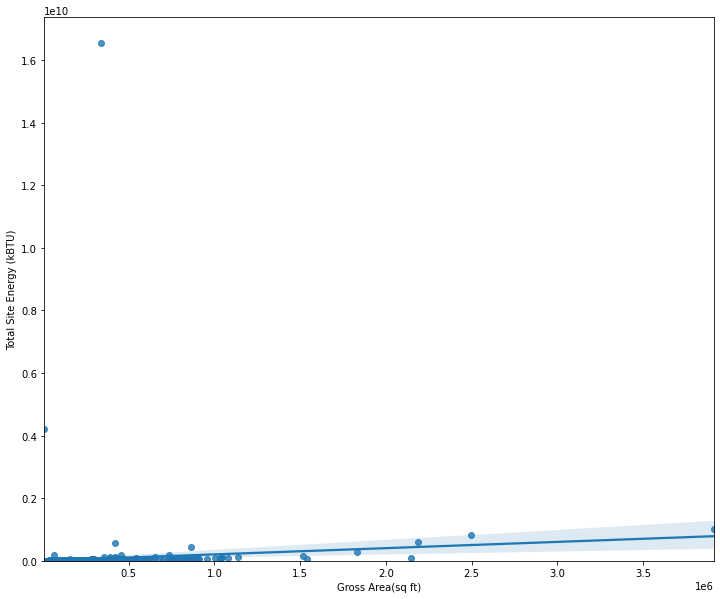

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Gross Area(sq ft)", y="Total Site Energy (kBTU)", data=df)
plt.ylim(0,)

The above graph shows the relationship between the area of the property and its energy consumption. <br>
We can see from this plot that the site's energy consumption is postively correlated to the area of the property since the regression slope is positive.<br>
As the area of the site increases it's energy usage also increases. <br>
Also, as almost all points are near the fitted line, we can conclude that linear regression model is a good choice here. 
One of the points is too far from the line which indicates the existence of outliers.
This shows one of the factors on which the energy consmuption is dependent. There are a number of other factors too which affect the energy consumption. <br>
This predictive model uses the equation of a line to estimate the energy consumed by the property using its gross area in square feet. <br>
According to this model, the energy consumption will be more for a larger property as compared to a similar property of a smaller size.<br> 


We are going to now split the data into test and training data to test the accuracy of the predicted model. 85% dataset is taken as the training data and rest 15% will be the testing data.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 147
number of training samples: 828


In [31]:
lre=LinearRegression()
print(lre.fit(x_train, y_train))
print(lre.score(x_test, y_test))
print(lre.score(x_train, y_train))

LinearRegression()
-0.0021382823894231517
0.07473270963249001


In [32]:
yhat_train = lre.predict(x_train)
yhat_train[0:5]

array([1.42574218e+07, 6.35830771e+06, 3.81990719e+06, 7.28908107e+05,
       6.16584939e+08])

In [34]:
yhat_test = lre.predict(x_test)
yhat_test[0:5]

array([1.56859146e+06, 2.23872031e+06, 3.46430272e+06, 1.13584159e+08,
       1.04266639e+07])

C:\Users\aayus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aayus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


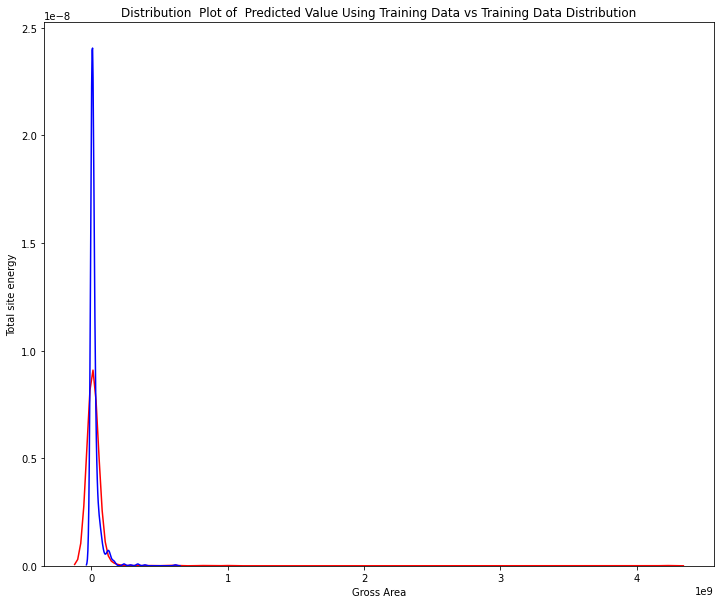

In [35]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

The blue values show the predicted values and the red values show the actual values. 
The R^2 value is used to determine the accuracy of the model. This tells us how well the unknown samples will be predicted by our model. The r^2 in this case is quite less(0.074). This indicates that the gross area is not enough to determine the total site energy consumption. Various other factors have to be taken into account and then after multiple passes will we get a refined model.

In [27]:
#displaying the correlation between the area and the site's energy consumption
df[['Gross Area(sq ft)','Total Site Energy (kBTU)']].corr()

,Gross Area(sq ft),Total Site Energy (kBTU)
Gross Area(sq ft),1.000000,0.093771
Total Site Energy (kBTU),0.093771,1.000000


<h3>Conclusion</h3>

In conclusion, the energy consumed by a property depends on many factors, the most important being its purpose. Hotels and Hospital buildings consume the most energy. This energy can be reduced by following a lot of energy efficent measures which might lead to increased cost.<br>
K-12 schools and offices tend to have a higher energy star score as compared to different property types. By replacing older equipment with newer equipment having a good energy star score can help a great deal in improving energy use intensity.Optimizing the area is also something that can be done.<br>
Listed below are the questions that were intended to be asked along with their answers.<br>
<ul>
<li>Question: How does the area of a building affect its energy consumption?<br>
    Answer: The area and energy consumption of a site are positively correlated which means that as the area increases, the energy consumption also increases.</li>
    
    
    
<li>Question: Which buildings consume the maximum energy? <br>
    Answer: Hotels and hospitals consume the maximum energy</li>
    
    
    
<li>Question: Will an increase in area increase the energy consumption of the building?<br>
    Answer: Yes</li>
    
    
    
<li>Question: What is the average energy use intesity for buildings in Boston?<br>
    Answer: The average energy use intesity for the year 2018 was 730 kBTU/sf.</li>
    
<li>Question: What is the maximum energy use intensity for buildings in Boston?<br>
    Answer:The maximum energy use intesity was 579540.1 kBTU/sf.
    
    
    
<li>Question: Which type of properties have the highest energy star score ?<br>
    Answer: K-12 schools and offices have the highest energy star score.</li>
    
    
<li>Question: What is the average energy star score of the buildings in Boston for the year 2018?<br>
    Answer:The average star score of the properties under survey in Boston for the year 2018 was 65.
</ul>

<h3>References</h3>


1.https://www.energystar.gov


2.https://matplotlib.org/stable/index.html


3.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



4.https://data.boston.gov/dataset/building-energy-reporting-and-disclosure-ordinance/resource/da68dc1a-46ad-4fd9-8627-8ca7e5fd39dd


5.https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html


6.https://saineng.com/4240-2/

